### Einführung

In diesem Abschnitt werden wir einen Vergleich zwischen der Leistung von zwei beliebten Datenmanipulationsbibliotheken durchführen: Pandas und Polars. Unser Hauptaugenmerk liegt darauf, wie diese Bibliotheken das Einlesen großer Datensätze handhaben und welches der beiden Pakete wann sinnvoller ist. Wir werden zwei wesentliche Aspekte untersuchen: die zum Einlesen eines großen Datensatzes benötigte Zeit (Lesezeit) und die Dauer von Filter-Operationen am Datensatz. Dieser Vergleich wird uns wertvolle Einblicke in die Effizienz und Eignung jeder Bibliothek für die Verarbeitung von Aufgaben mit großen Datenmengen geben.

<strong>Vergleich der Lesezeit </strong>`%time`
<br>

Beginnen wir mit dem Vergleich, wie schnell Pandas und Polars einen großen Datensatz einlesen können. Wir verwenden den `%time` Magic-Command in Jupyter, um die Zeit zu messen, die zum Einlesen desselben Datensatzes mit jeder Bibliothek benötigt wird.

<strong>Verwendung von </strong>`%%capture`
<br>

Der Grund für die Verwendun von `%%capture` in Jupyter Notebooks ist die Unterdrückung der Ausgabe, die von bestimmten Befehlen erzeugt wird.
In diesem Fall verwenden wir `%%capture`, um die Ausgabe des Befehls `%%cd` zu unterdrücken, der das aktuelle Arbeitsverzeichnis ändert. Das ist nützlich, um die Ausgabe übersichtlich zu halten und nur relevante Informationen anzuzeigen.
Es ist wichtig zu beachten, dass `%capture` alle Ausgaben der Zelle unterdrückt, in der es verwendet wird. Daher sollte es mit Bedacht eingesetzt werden, um keine wichtigen Informationen zu verbergen. Durch die Verwendung von `%%capture` können wir das Notebook sauberer und fokussierter auf die wesentlichen Inhalte gestalten, was besonders bei Präsentationen oder der gemeinsamen Nutzung des Notebooks hilfreich sein kann. <br>

#### SETUP

In [2]:
%%capture
# Notwendige Packages importieren
import gc
import time
import pandas as pd
import polars as pl
import warnings
from IPython.display import display

# Falls etwas importert werden soll, dass nicht im oder unter dem aktuellen Verzeichnes liegt 
# kann mit %cd das Arbeitsverzeichnis geändert werden



# config.py importieren
from config import Config

# Zurück zum ursprünglichen Verzeichnis
#%cd notebooks 
# warnings ignorieren

config = Config()

# gc ist der Garbage-Collector. Dieser Hintergrunddienst von Python löscht in regelmäßigen Abständen Datenobjekte, die nicht mehr benötigt werden.
# Da dieser Prozess periodisch abläuft, kann es sein, dass nicht mehr verwendete Daten während der weiteren Ausführung noch immer im Speicher aktiv sind
# Durch gc.collect() kann der Löschvorgang des Garbage-Collectors manuell gestartet werden.
# Das ist nützlich, falls man geladene Objekte wie z.B. große DataFrames sofort löschen möchte, bevor man das nächste Objekt lädt, um den 
# verfügbaren Speicher effizient zu nutzen.
gc.collect()

def calculate_cpu_wall_time(operation, *args, **kwargs):
    """
    :param operation: Die Funktion, die ausgeführt werden soll
    :param args: Argumente für die Funktion.
    :param kwargs: Keyword-Argumente für die Funktion.
    :return: 
    """
    gc.collect()  # Speicher aufräumen, um genauere Messungen zu erhalten
    
    # Startzeit messen
    start_wall = time.time()
    start_cpu = time.process_time()
    
    # Funktion ausführen
    result = operation(*args, **kwargs)
    
    # Endzeit messen
    end_wall = time.time()
    end_cpu = time.process_time()
    
    # Zeit berechnen
    wall_time = end_wall - start_wall
   
    cpu_time = end_cpu - start_cpu
    
    return wall_time, cpu_time
    

### 1. Vergleich von Pandas und Polars beim Einlesen großer Datensätze

In diesem Abschnitt vergleichen wir die Leistung von Pandas und Polars beim Einlesen eines großen Datensatzes (`animelist.csv`), der etwa 2GB groß ist. Wir messen die CPU-Zeit und die Wandzeit, um zu sehen, welche Bibliothek den Datensatz schneller verarbeiten kann.

**Pandas**

Pandas ist eine weit verbreitete Datenmanipulationsbibliothek in Python, die sich durch eine umfangreiche API und eine intuitive Handhabung auszeichnet. 

**Lesen des Datensatzes mit Pandas**

Wir verwenden die Magic-Methode `%time` in Jupyter, um die Leistung beim Einlesen der Datei zu messen:


In [2]:
gc.collect()
print("Pandas read time: ")
%time pandas_anime_df = pd.read_csv(config.data_input_path.joinpath('animelist.csv'))
warnings.filterwarnings("ignore")

pandas_2gb_wall_time,  pandas_2gb_cpu_time = calculate_cpu_wall_time(pd.read_csv, config.data_input_path.joinpath('animelist.csv'))

Pandas read time: 
CPU times: total: 17.7 s
Wall time: 23.6 s


**Polars**

Polars ist eine neuere Bibliothek, die für ihre hohe Leistung und effiziente Nutzung von Multi-Threading und Lazy Evaluation bekannt ist.

**Lesen des Datensatzes mit Polars**

Auch hier nutzen wir die %time Magic-Methode, um die Lesegeschwindigkeit zu messen:

In [3]:
print("Polars read time: ")
gc.collect()
%time polars_anime_df = pl.read_csv(config.data_input_path.joinpath('animelist.csv'))

polars_2gb_wall_time,  polars_2gb_cpu_time = calculate_cpu_wall_time(pl.read_csv, config.data_input_path.joinpath('animelist.csv'))

Polars read time: 
CPU times: total: 9.97 s
Wall time: 3.78 s


In [6]:
polars_anime_df.head(40)

user_id,anime_id,rating,watching_status,watched_episodes
i64,i64,i64,i64,i64
0,67,9,1,1
0,6702,7,1,4
0,242,10,1,4
0,4898,0,1,1
0,21,10,1,0
0,24,9,1,5
0,2104,0,1,4
0,4722,8,1,4
0,6098,6,1,2


**Polars Lazy Loading mit `scan`**

Lazy Loading ist ein leistungsstarkes Konzept, das von Polars verwendet wird, um die Effizienz beim Einlesen großer Datensätze zu steigern. Anstatt den gesamten Datensatz sofort in den Speicher zu laden, verwendet Polars eine Technik namens "Scan", um die Datenstruktur zu initialisieren und die tatsächlichen Daten erst bei Bedarf zu laden.

>Vorteile des Scannens

>- **Speichereffizienz**: Beim Scannen wird der Datensatz nicht sofort geladen, was bedeutet, dass der Speicher nicht mit unnötigen Daten überladen wird.
>- **Geschwindigkeit**: Es ermöglicht Polars, sehr schnell zu arbeiten, weil nur die benötigten Daten verarbeitet werden, wenn es wirklich nötig ist (zum Beispiel beim Ausführen von Aggregationen oder Filtern).
>- **Datenverarbeitung in Teilen**: Für besonders große Datensätze, die nicht ganz in den Arbeitsspeicher passen würden, erlaubt das Scannen die Verarbeitung in kleineren, handhabbaren Teilen.

**Verwendung von `scan` in Polars**

In diesem Beispiel wird die `scan`-Funktion verwendet, um einen schnellen Überblick über die Struktur des Datensatzes zu erhalten:

In [4]:
print("-----------", "\n")
print("Polars read time: ")
# data_source: https://www.kaggle.com/code/fahadbinahmed/anime-recommendation-system-cf/input
%time polars_anime_lazydf = pl.scan_csv(config.data_input_path.joinpath('animelist.csv'))

polars_2gb_lazy_wall_time,  polars_2gb_lazy_cpu_time = calculate_cpu_wall_time(pl.read_csv, config.data_input_path.joinpath('animelist.csv'))

----------- 

Polars read time: 
CPU times: total: 0 ns
Wall time: 6.07 ms


### Vergleich der Ladezeiten beim Lesen eines großen CSVs - TEIL 2

Für den Vergleich der Ladezeiten wird folgendes CSV (4,5 GB) herangezogen: <a href="https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?select=final_animedataset.csv">https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?select=final_animedataset.csv</a>

**Pandas**

In [8]:
print("Pandas read time: ")
gc.collect()
%time pandas_df = pd.read_csv(config.data_input_path.joinpath('final_animedataset.csv'))
warnings.filterwarnings("ignore")

pandas_4gb_wall_time, pandas_4gb_cpu_time = calculate_cpu_wall_time(pd.read_csv, config.data_input_path.joinpath('final_animedataset.csv'))

Pandas read time: 


MemoryError: Unable to allocate 539. MiB for an array with shape (2, 35305695) and data type float64

**Polars**

In [2]:
print("-----------", "\n")
print("Polars read time: ")
gc.collect()

%time polars_df = pl.read_csv(config.data_input_path.joinpath('final_animedataset.csv'))

polars_4gb_wall_time,  polars_4gb_cpu_time = calculate_cpu_wall_time(pl.read_csv, config.data_input_path.joinpath('final_animedataset.csv'))

----------- 

Polars read time: 
CPU times: total: 19.7 s
Wall time: 10.3 s
31.538016080856323


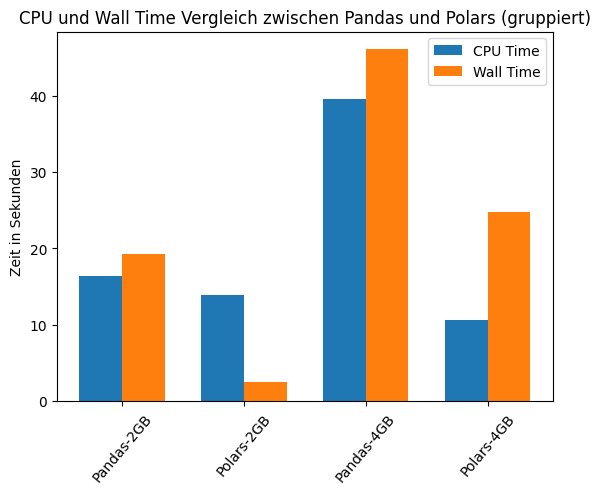

In [13]:
import matplotlib.pyplot as plt

# Definieren der Daten für den Barchart
libraries = ['Pandas-2GB', 'Polars-2GB', 'Pandas-4GB', 'Polars-4GB']
cpu_times = [pandas_2gb_cpu_time, polars_2gb_cpu_time, pandas_4gb_cpu_time, polars_4gb_cpu_time]  # CPU Zeiten in Sekunden
wall_times = [pandas_2gb_wall_time, polars_2gb_wall_time, pandas_4gb_wall_time, polars_4gb_wall_time]  # Wall Zeiten in Sekunden

# Erstellen eines gruppierten Bar Charts
fig, ax = plt.subplots()

# Setzen der Position der Balken auf der x-Achse
x_positions = range(len(cpu_times))  # Die x-Achsenpositionen für die Gruppen
width = 0.35  # Breite der Balken

# Erstellen der Balken für CPU-Zeiten und Wall-Zeiten
cpu_bars = ax.bar(x_positions, cpu_times, width, label='CPU Time')
wall_bars = ax.bar([p + width for p in x_positions], wall_times, width, label='Wall Time')

# Hinzufügen der Beschriftungen
ax.set_title('CPU und Wall Time Vergleich zwischen Pandas und Polars (gruppiert)')
ax.set_xticks([p + width / 2 for p in x_positions])
ax.set_xticklabels(libraries, rotation = 50)
ax.legend()

# Beschriftung der y-Achse
ax.set_ylabel('Zeit in Sekunden')

# Anzeigen des Bar Charts
plt.show()

Wie hier zu sehen ist, kann Polars das CSV deutlich schneller zu laden. Das ist aber nur ein Teil-Aspekt. Die wichtigste Stärke von Polars liegt in der Nutzung von Lazy-Loading. 

#### Lazy-Loading

Pandas Dataframes müssen ein CSV oder eine andere Datendatei komplett in den RAM laden und parsen, um damit arbeiten zu können. Polars unterstützt ein lazy-loading, welches über "scan"-Methoden wie z.B. "scan_csv" genutzt werden kann. Im Rahmen von scan liest polars das CSV nach und nach ein, wendet etwaige angewendete Filter an und lädt erst am Ende die relevanten Zeilen in den Speicher. Wenn Transformationen, Filter, Berechnungen oder Aggregationen durchgeführt werden, kann dadurch der Datensatz deutlich schneller geladen werden.

Polars ist daher mit Lazy-Loading besonders schnell, wenn es als Lade- und Transformations-Tool genutzt wird.

Bei der Anwendung von Lazy-Loading wird zuerst mit csv_scan das File als LazyDataFrame geöffnet, danach werden darauf Operationen ausgeführt und erst mit dem Aufruf von .collect() wird der Scan und die Operationen auf einmal ausgeführt. 

#### Vergleich der Ladezeiten beim Einlesen und Transformieren eines großen CSVs

Für den Vergleich der Lade- und Transformationszeiten wird dasselbe CSV verwendet.

**Pandas**

In [8]:
gc.collect()

def read_and_filter_csv_with_pandas():
    print("Pandas read and filter time")
    pandas_df = pd.read_csv(config.data_input_path.joinpath('final_animedataset.csv'))
    filtered_pandas_df = pandas_df[pandas_df["gender"] == "Female"]
    return filtered_pandas_df

%time filtered_pandas_df = read_and_filter_csv_with_pandas()

Pandas read and filter time
CPU times: total: 1min 7s
Wall time: 1min 26s


**Polars - Lazy-Loading**

In [9]:
gc.collect()

def read_and_filter_csv_with_polars():
    print("Polars read time: ")
    polars_df_scan = pl.scan_csv(config.data_input_path.joinpath('final_animedataset.csv'))
    filtered_polars_df_scan = polars_df_scan.filter(pl.col("gender") == "Female")
    filtered_polars_df_scan = filtered_polars_df_scan.collect()
    return filtered_polars_df_scan
    
%time filtered_polars_df_scan = read_and_filter_csv_with_polars()

Polars read time: 
CPU times: total: 10.6 s
Wall time: 5.56 s


### 2. Filtering Data

In diesem Abschnitt wird die Zeit gemessen, die benötigt wird, um Zeilen basierend auf einer Bedingung zu filtern. Es wird der Anwendungsfall betrachtet, bei dem die Durchschnittswerte der Spalte `rating` für bestimmte Kategorien der Spalte `watching_status` berechnet und ausgegeben werden.

Bei der Verwendung von  **Polars** wird folgender Code verwendet:

In [11]:
polars_anime_df.head()

user_id,anime_id,rating,watching_status,watched_episodes
i64,i64,i64,i64,i64
0,67,9,1,1
0,6702,7,1,4
0,242,10,1,4
0,4898,0,1,1
0,21,10,1,0


| **Status**             | **ID of the Status** |
|-------------------------|----------------------|

| Currently Watching     | 1                    |
| Completed              | 2                    |
| On Hold                | 3                    |
| Dropped                | 4                    |
| Plan to Watch          | 6                    |

In [12]:
%time polars_anime_df \
    .groupby(by = "watching_status") \
    .agg(pl.col("rating").mean() \
    .alias("mean rating")) \
    .filter(pl.col("watching_status") \
    .is_in([3, 4])) \
    .sort("watching_status")

CPU times: total: 2.14 s
Wall time: 1.92 s


watching_status,mean rating
i64,f64
3,2.056822
4,2.193857


**Pandas**

Für die gleiche Operation in Pandas sieht der Code wie folgt aus:



In [13]:
# Gruppieren nach 'watching_status', berechnen des Durchschnitts der 'rating' und Filtern für bestimmte watching_status
%time pandas_anime_df[['watching_status', 'rating']] \
    .groupby("watching_status", as_index=False).mean() \
    .rename(columns={"rating": "mean rating"}) \
    .query("watching_status in [3, 4]") \
    .sort_values("watching_status")

CPU times: total: 3.48 s
Wall time: 7.16 s


,watching_status,mean rating
3,3,2.056822
4,4,2.193857


> ODER

In [14]:
# Gruppieren nach 'watching_status', berechnen des Durchschnitts der 'rating' und Filtern für die Werte 3 und 4
%time pandas_result = pandas_anime_df.groupby("watching_status")["rating"].mean().reset_index().rename(columns={"rating": "mean rating"})
%time pandas_result = pandas_result[pandas_result["watching_status"].isin([3, 4])].sort_values("watching_status")

CPU times: total: 2.02 s
Wall time: 2.11 s
CPU times: total: 0 ns
Wall time: 0 ns


Auch hier wird eine Tabelle mit den Spalten `watching_status` und `mean rating` ausgegeben, die die durchschnittlichen Bewertungen für die gewählten Statuswerte anzeigt.

Die Ergebnisse demonstrieren, wie beide Bibliotheken eine ähnliche Aufgabe der Datenaggregation und -filterung durchführen können. Die Zeitmessungen geben Aufschluss darüber, wie schnell jede Bibliothek die Operationen ausführt. Es wird deutlich, dass beide Bibliotheken effizient in der Lage sind, die erforderlichen Berechnungen durchzuführen, wobei Polars eine geringere Wall-Zeit aufweist, was auf eine schnellere Ausführung der Operationen hinweist.

### 3. Erweiterte Aggregation und Filterung

In diesem Abschnitt wird ein komplexerer Aggregations- und Filterprozess vorgestellt, der zeigt, wie beide Bibliotheken mit umfangreicheren Datenmanipulationsaufgaben umgehen.

Polars zeigt seine Stärken bei Kettenoperationen, die es ermöglichen, mehrere Schritte in einer einzigen, fließenden Anweisung auszuführen. Dies wird durch die Syntax von Polars erleichtert, die klare und verkettete Befehle unterstützt.

**Polars**

In [13]:
%time polars_anime_df \
    .groupby(by = "watching_status") \
    .agg([ \
         pl.col("rating").mean().alias("mean rating"), \
         pl.col("rating").median().alias("median rating"), \
         pl.col("rating").sum().alias("sum rating") \
        ]) \
    .filter(pl.col("watching_status") \
    .is_in([3, 4])) \
    .sort("watching_status")

CPU times: total: 17.1 s
Wall time: 11.3 s


watching_status,mean rating,median rating,sum rating
i64,f64,f64,i64
3,2.056822,0.0,7611298
4,2.193857,0.0,9360292


**Pandas**

Hier wird eine Tabelle mit `watching_status` und den statistischen Werten von `rating` angezeigt, jedoch in einer weniger direkten Art und Weise im Vergleich zu Polars.

Die Ergebnisse illustrieren die syntaktischen und leistungsbezogenen Vorteile von Polars bei Kettenoperationen und wie es die Ausführung komplexer Datenmanipulationsaufgaben vereinfacht. Es wird deutlich, dass Polars bei diesen spezifischen Operationen eine schnellere Wall-Zeit aufweist und somit in der Leistung überlegen sein kann.

In [77]:
%time pandas_anime_df[['watching_status', 'rating']] \
    .groupby("watching_status", as_index=False) \
    .agg({ \
    "rating": ["mean", "median", "sum"] \
    }).rename(columns={ \
    "mean": "average rating", \
    "median": "median rating", \
    "sum": "sum rating" \
}).reset_index()

CPU times: total: 6.47 s
Wall time: 6.82 s


index watching_status         rating                         
                        average rating median rating sum rating
0     0               0       1.305085           0.0        693
1     1               1       2.242877           0.0   11727238
2     2               2       6.357365           7.0  432871375
3     3               3       2.056822           0.0    7611298
4     4               4       2.193857           0.0    9360292
5     5               5       1.166667           0.0          7
6     6               6       0.077542           0.0    2166418
7     7              33       2.500000           2.5          5
8     8              55       0.000000           0.0          0

In [22]:
import numpy as np

def create_large_dataset(num_rows: int):
    """ Erstellt einen großen Datensatz für die Demo. """
    np.random.seed(0)
    data = {
        "A": np.random.randint(0, 100, num_rows),
        "B": np.random.rand(num_rows),
        "C": np.random.choice(['X', 'Y', 'Z'], num_rows)
    }
    return pd.DataFrame(data), pl.DataFrame(data)

def filter_data_pandas(df: pd.DataFrame, column: str, value):
    """ Filterfunktion für Pandas. """
    return df[df[column] == value]

def filter_data_polars(df: pl.DataFrame, column: str, value):
    """ Filterfunktion für Polars. """
    return df.filter(pl.col(column) == value)

# Erstelle einen großen Datensatz
num_rows = 10_000_000  # 10 Millionen Zeilen
pandas_df, polars_df = create_large_dataset(num_rows)

# Filtere Daten in Pandas und messe die Zeit
%time filtered_pandas = filter_data_pandas(pandas_df, 'C', 'X')

# Filtere Daten in Polars und messe die Zeit
%time filtered_polars = filter_data_polars(polars_df, 'C', 'X')

CPU times: total: 469 ms
Wall time: 672 ms
CPU times: total: 219 ms
Wall time: 242 ms


### Erstellung interaktiver Berichte in Jupyter Notebooks

**Datenprofiling mit ydata-profiling**

Das Tool ydata-profiling, früher bekannt als pandas-profiling, ist ein leistungsstarkes Werkzeug zur Erstellung von Profilberichten aus Pandas DataFrames. Es wurde entwickelt, um Data Scientists eine umfassende Analyse ihrer Daten in einem interaktiven HTML-Bericht zu ermöglichen.

**Über ydata-profiling:**
Entwicklung: Ursprünglich als unabhängiges Werkzeug ins Leben gerufen, ist es nun Teil der YData-Plattform, die sich auf Lösungen im Bereich Data Science spezialisiert.

>**Funktionalität:** Generiert detaillierte Berichte, die Statistiken, Visualisierungen und Informationen über Datensätze enthalten, um eine schnelle und gründliche explorative Datenanalyse zu erleichtern.
>
>**Erweiterung:** Im Gegensatz zu seiner früheren Inkarnation unterstützt ydata-profiling nicht nur Pandas DataFrames, sondern auch Spark DataFrames, was es ideal für die Arbeit mit größeren Datensätzen und in verteilten Systemen macht.

Dieses Tool ist eine wertvolle Ergänzung zu Ihrer Data-Science-Toolbox, da es hilft, Zeit zu sparen und ein tieferes Verständnis für die Daten zu gewinnen, mit denen Sie arbeiten.

**Erstellung eines Reports mit Pandas-Profiling in einem Jupyter Notebook:**

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ireme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

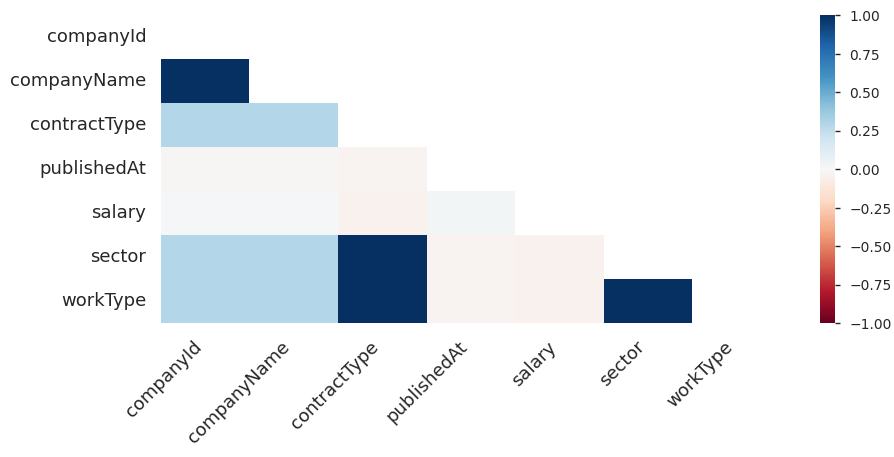

In [19]:
from ydata_profiling import ProfileReport
import nltk
from nltk.corpus import stopwords 

# importiere stopwords
nltk.download('stopwords')

# Quelle: https://www.kaggle.com/datasets/kanchana1990/linkedin-canada-data-science-jobs-2024?select=linkedin_canada.csv
linkedin_canada_df = pd.read_csv(config.data_input_path.joinpath("linkedin_canada.csv"))
# Erstellen des Profiling-Reports
stream_profile = ProfileReport(linkedin_canada_df, title="Pandas Stream Profiling Report", explorative=True, vars={"cat": {"stop_words": stopwords.words('english')}})

# Anzeigen des Reports im Jupyter Notebook
stream_profile.to_notebook_iframe()


## Explorative Visualisierung mit Pygwalker

In [3]:
import pygwalker as pyg
# Quelle: https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset
airbnb_df = pd.read_csv(config.data_input_path.joinpath("bike_sharing_dc_final.csv"))
warnings.filterwarnings("ignore")

walker = pyg.walk(airbnb_df)
warnings.filterwarnings("ignore")


Box(children=(HTML(value='<div id="ifr-pyg-00062beca4f0ac0aCeKOwy84N2XpjR6a" style="height: auto">\n    <head>…